Using TensorFlow backend.


Shape of training dataset : (50000, 32, 32, 3)
Shape of testing dataste : (10000, 32, 32, 3)
Epoch 1/50
1563/1562 [==============================] - 54s 35ms/step - loss: 1.9036 - acc: 0.3288 - val_loss: 3.2987 - val_acc: 0.1181
Epoch 2/50
1563/1562 [==============================] - 53s 34ms/step - loss: 1.6049 - acc: 0.4267 - val_loss: 3.9509 - val_acc: 0.1023
Epoch 3/50
1563/1562 [==============================] - 53s 34ms/step - loss: 1.4966 - acc: 0.4671 - val_loss: 4.2147 - val_acc: 0.1214
Epoch 4/50
1563/1562 [==============================] - 53s 34ms/step - loss: 1.4327 - acc: 0.4921 - val_loss: 4.3809 - val_acc: 0.1169
Epoch 5/50
1563/1562 [==============================] - 53s 34ms/step - loss: 1.3812 - acc: 0.5152 - val_loss: 4.6596 - val_acc: 0.1150
Epoch 6/50
1563/1562 [==============================] - 53s 34ms/step - loss: 1.3282 - acc: 0.5349 - val_loss: 4.8343 - val_acc: 0.1219
Epoch 7/50
1563/1562 [==============================] - 53s 34ms/step - loss: 1.2884 - acc:

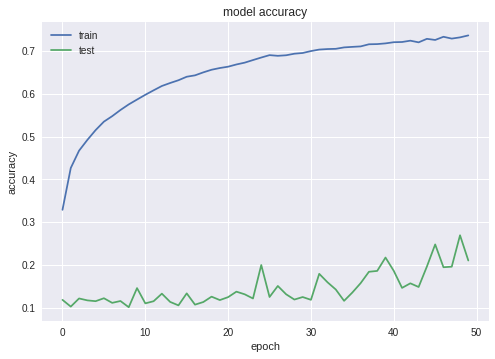

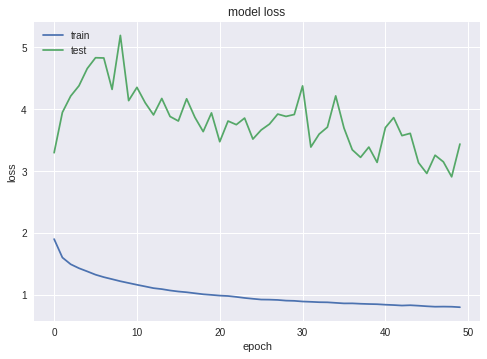

In [1]:
import keras 
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout,Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.datasets import cifar10
from keras.optimizers import SGD 

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :',x_train.shape)
print('Shape of testing dataste :' ,x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=[32,32,3],kernel_regularizer=regularizers.l2(0.0001),padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.0001),padding='same'))
#model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0001),padding='same'))
#model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.4))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0001),padding='same'))
#model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0001),padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0001),padding='same'))
#model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

SGD = SGD(lr=0.01, decay=1e-6, momentum=0.9)

model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip = False)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=50,
                    validation_data = (x_test,y_test))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()